# road type by location

an interactive notebook to display roads by type. 

first load the required packages and perform some other setup

In [1]:
import sys
import pathlib
import shutil

import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx

%matplotlib inline
ox.config(log_console=True, use_cache=True)

here you will input your city name:

In [6]:
city_name = 'Christchurch City, New Zealand'

run this code to download this the bounding polygon of the city.

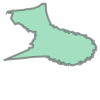

In [7]:
city = ox.gdf_from_place(city_name)
city_polygon = city['geometry'][0]
city_polygon

In [8]:
# Download streets and creat a graph
city_graph = ox.graph_from_polygon(city_polygon, network_type='all') 

# Convert the graph to a geopandas dataframe so we can extract street type information
city_graph_gdf = ox.graph_to_gdfs(city_graph, nodes=False)

# Add street colour to the geopandas dataframe
colour_dic = {
    'road':'#019868',
    'street': '#f6cf71',
    'way': '#ec0b88',
    'avenue': '#651eac',
    'drive': '#e18a1e',
    'lane': '#9dd292',
}

def street_type(street_name):
    for key in colour_dic:
        if key in street_name.lower():
            return key
    else:
        return 'other'

city_graph_gdf['street_type'] = city_graph_gdf['name'].map(lambda x: street_type(str(x)))

def colourcode(street_name):
    for key in colour_dic:
        if key in street_name.lower():
            return colour_dic[key]
    else:
        return '#c6c6c6'

city_graph_gdf['colour'] = city_graph_gdf['name'].map(lambda x: colourcode(str(x)))

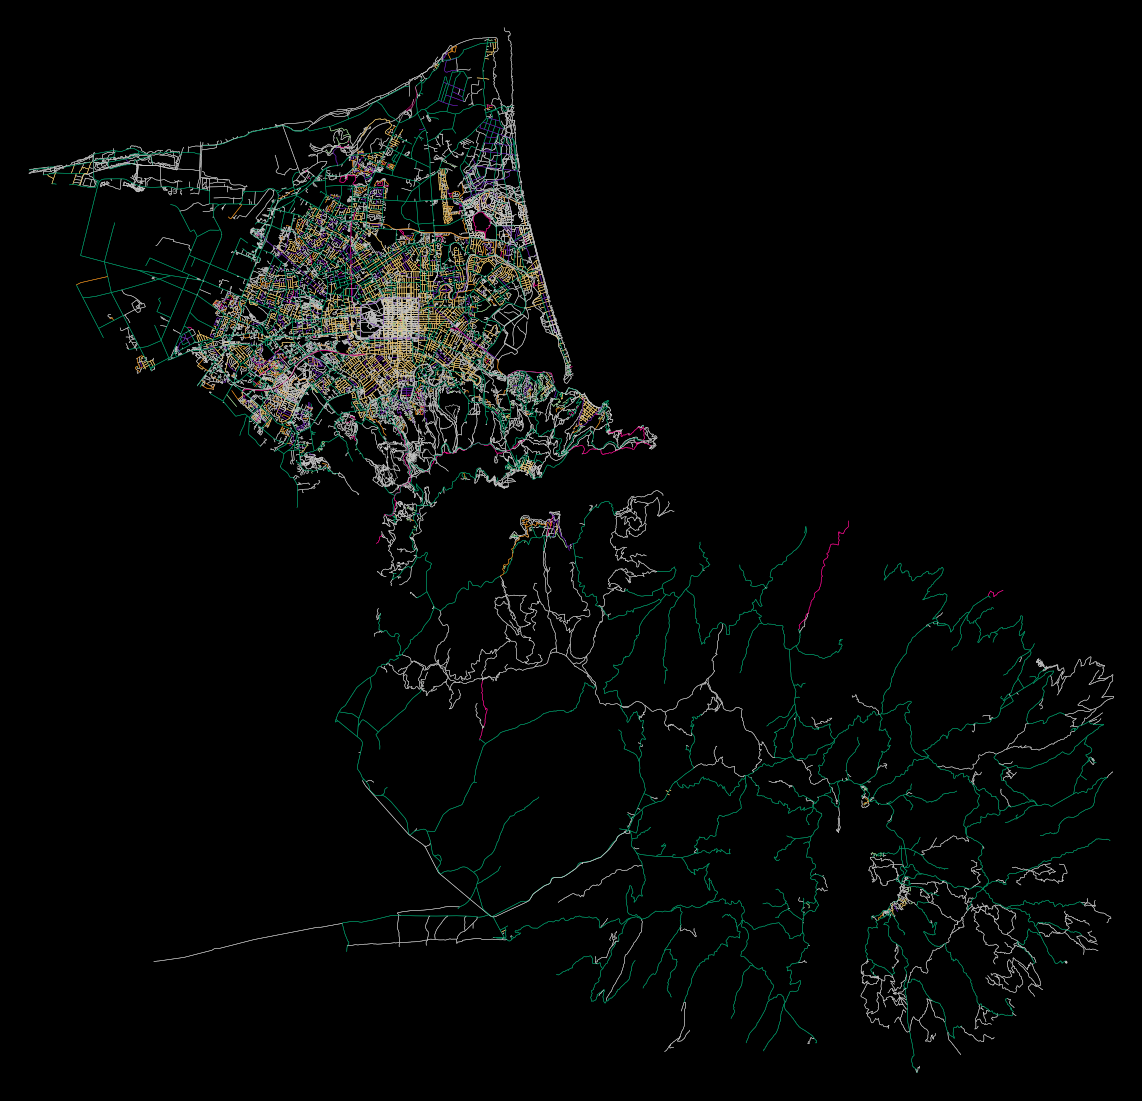

In [10]:
# Draw the plot
fig, ax = ox.plot_graph(
    city_graph, 
    bgcolor='black', 
    axis_off=True, 
    node_size=0, 
    node_color='w', 
    node_edgecolor='gray', 
    node_zorder=2,
    edge_color=city_graph_gdf['colour'], 
    edge_linewidth=0.5, 
    edge_alpha=1, 
    fig_height=20, 
    dpi=300,
)

In [5]:
ox.save_gdf_shapefile(city_graph_gdf[city_graph_gdf['colour']!='#c6c6c6'].copy(), "city", OUT_DIR)
shutil.make_archive(OUT_DIR/'city', 'zip', OUT_DIR/'city')
shutil.rmtree(OUT_DIR/'city')
fig.savefig(OUT_DIR/'street_colours.png', dpi=300)

In [6]:
city_graph_gdf['street_type']

0         other
1          road
2          road
3         other
4         other
          ...  
159578    other
159579     road
159580    other
159581     road
159582    other
Name: street_type, Length: 159583, dtype: object

In [7]:
def street_type_2(street_name):
    name = street_name.split(' ')[-1].lower()
    if name == 'nan':
        return 'other'
    else:
        return name

city_graph_gdf['street_type_2'] = city_graph_gdf['name'].map(lambda x: street_type_2(str(x)))

In [8]:
city_graph_gdf['street_type_2']

0          other
1           road
2           road
3          other
4          other
           ...  
159578     other
159579      road
159580    parade
159581      road
159582     other
Name: street_type_2, Length: 159583, dtype: object

In [9]:
city_graph_gdf['name'].head(n=20)

0                         NaN
1                Manukau Road
2                Manukau Road
3                         NaN
4                         NaN
5                         NaN
6                Manukau Road
7                Manukau Road
8                         NaN
9     Walter MacDonald Street
10              Picton Street
11              Picton Street
12    Walter MacDonald Street
13            Bleakhouse Road
14      Charles Dickens Drive
15            Bleakhouse Road
16            Bleakhouse Road
17                Colmar Road
18            Bleakhouse Road
19                Colmar Road
Name: name, dtype: object